In [117]:
# importing dependencies
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import string
import nltk
from wordcloud import WordCloud
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# downloading vader_lexicon, stopwords etc and added ";" at the end to avoid it from outputting "True"
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [92]:
# importing csv file
womens_clothing_data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
womens_clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [93]:
# now transposing the dataframe to convert columns to rows
womens_clothing_data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Clothing ID,767,1080,1077,1049,847
Age,33,34,60,50,47
Title,NaN,NaN,Some major design flaws,My favorite buy!,Flattering shirt
Review Text,Absolutely wonderful - silky and sexy and comf...,Love this dress! it's sooo pretty. i happene...,I had such high hopes for this dress and reall...,"I love, love, love this jumpsuit. it's fun, fl...",This shirt is very flattering to all due to th...
Rating,4,5,3,5,5
Recommended IND,1,1,0,1,1
Positive Feedback Count,0,4,0,0,6
Division Name,Initmates,General,General,General Petite,General
Department Name,Intimate,Dresses,Dresses,Bottoms,Tops


# Inspecting Our Dataframe

In [94]:
womens_clothing_data.shape

(23486, 11)

In [95]:
womens_clothing_data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [96]:
womens_clothing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [97]:
womens_clothing_data[womens_clothing_data['Title'].isnull()]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...,...
23450,23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses
23458,23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits
23470,23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [98]:
womens_clothing_data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

# Cleaning our Dataframe

In [99]:
# cleaning up Title & Review Text Features
womens_clothing_data['Title'] = womens_clothing_data['Title'].replace('nan',np.NaN)
womens_clothing_data.dropna(subset=['Title'], how='all', inplace = True)
womens_clothing_data['Review Text'] = womens_clothing_data['Review Text'].replace('nan',np.NaN)
womens_clothing_data.dropna(subset=['Review Text'], how='all', inplace = True)

In [100]:
# grabbing the most popular value of important features
mode_division = womens_clothing_data['Division Name'].mode()[0]
mode_department = womens_clothing_data['Department Name'].mode()[0]
mode_class = womens_clothing_data['Class Name'].mode()[0]

# replacing NaN columns with mode value
womens_clothing_data['Division Name'] = womens_clothing_data['Division Name'].fillna(mode_division)
womens_clothing_data['Department Name'] = womens_clothing_data['Department Name'].fillna(mode_division)
womens_clothing_data['Class Name'] = womens_clothing_data['Class Name'].fillna(mode_division)

In [101]:
# reviewing clean up dataframe
womens_clothing_data[["Title", "Division Name","Department Name","Class Name","Review Text"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13992,Love it!,136
Division Name,3,General,11677
Department Name,7,Tops,8713
Class Name,21,Dresses,5371
Review Text,19669,Perfect fit and i've gotten so many compliment...,3


In [102]:
# reviewing actual data
womens_clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [103]:
# calculating sentiment feature
SentAnalyzer = SentimentIntensityAnalyzer()
womens_clothing_data['Title'] = womens_clothing_data['Title'].astype(str)
womens_clothing_data['Polarity Score'] = womens_clothing_data['Title'].apply(lambda x:SentAnalyzer.polarity_scores(x)['compound'])
womens_clothing_data['Sentiment'] = ''
womens_clothing_data.loc[womens_clothing_data['Polarity Score'] > 0,'Sentiment'] = 'Positive'

womens_clothing_data.loc[womens_clothing_data['Polarity Score'] < 0,'Sentiment'] = 'Negative'
womens_clothing_data.loc[womens_clothing_data['Polarity Score'] == 0,'Sentiment'] = 'Neutral'
womens_clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity Score,Sentiment
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.0000,Neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5093,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.3182,Positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.0000,Neutral
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.5106,Positive


# Exporting cleaned up data to CSV for Tableau Visualization

In [104]:
womens_clothing_data.to_csv("Womens_Clothing_Data_For_Tableau.csv", index=False, encoding='utf-8')

In [105]:
# Setting up the seaborn plot
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(12.0,12.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15}) 

# Customer Rating vs Age Groups

In [106]:
age = pd.cut(womens_clothing_data['Age'],bins = [0, 25, 45, 60, 75, 100],labels = ['<=25', '<=45', '<=60', '<=75', '<=100',])
print("Customer Age Group Count:")
print(age.value_counts().sort_values())

Customer Age Group Count:
<=100      144
<=25       993
<=75      1898
<=60      5679
<=45     10961
Name: Age, dtype: int64


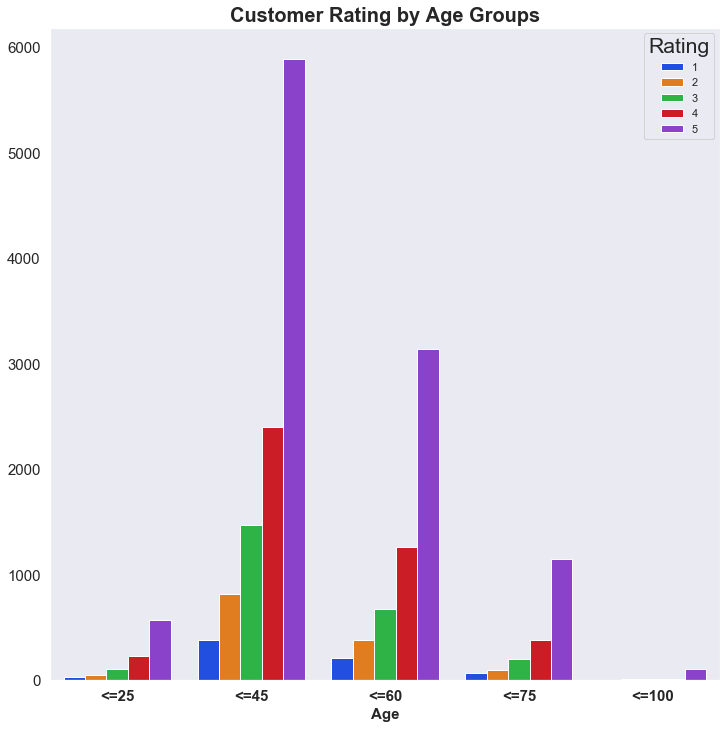

In [107]:
sns.countplot(x=age,hue=womens_clothing_data['Rating'], palette = sns.color_palette('bright', 5))
plt.title("Customer Rating by Age Groups",fontsize=20,fontweight='bold')
plt.ylabel("")
plt.xlabel('Age',fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.show()

# Sentiment vs Rating by Department

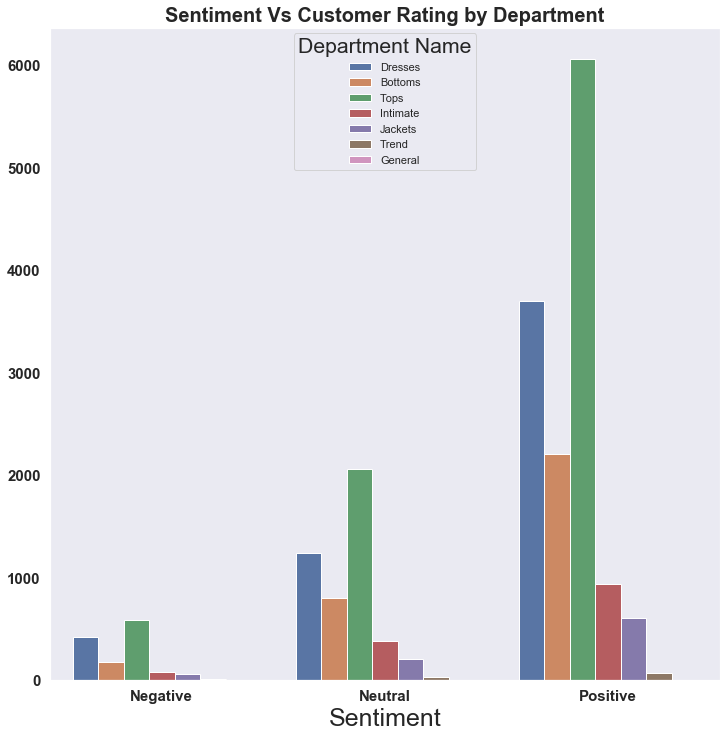

In [108]:
xvar = "Sentiment"
huevar = "Rating"
rowvar = "Department Name"

sns.countplot(x=xvar,hue=rowvar,data=womens_clothing_data,
         order=["Negative","Neutral","Positive"])
plt.title("Sentiment Vs Customer Rating by Department",fontsize=20,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.ylabel("")
plt.show()

## Correlation Heatmap Plots: Division, Department, and Class against each other

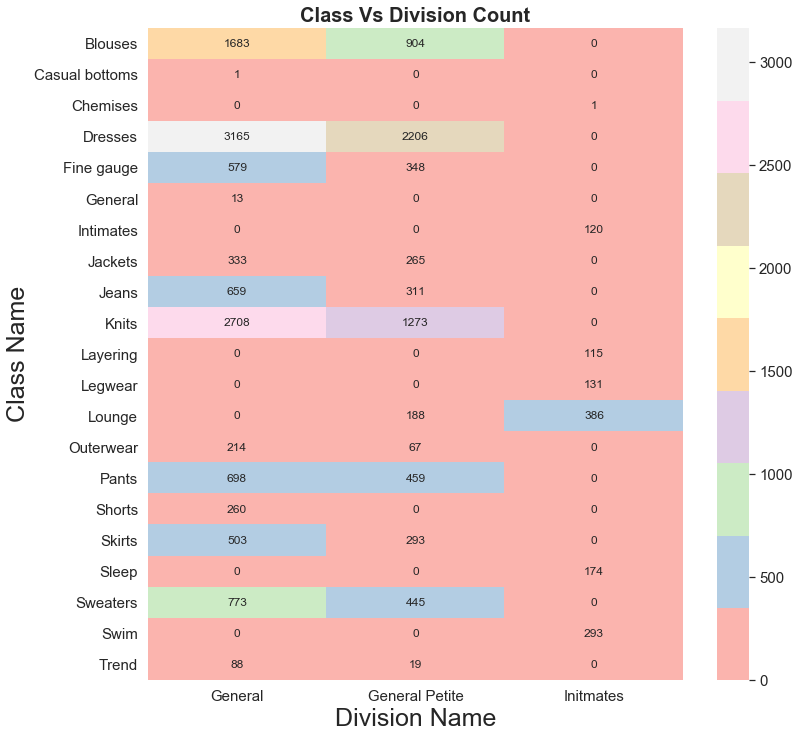

In [109]:
# Class Vs Division Count cross-tabulation table
sns.heatmap(pd.crosstab(womens_clothing_data['Class Name'], womens_clothing_data["Division Name"]),
            annot=True,fmt='g', cmap="Pastel1")
plt.title("Class Vs Division Count",fontsize=20,fontweight='bold')

plt.show()

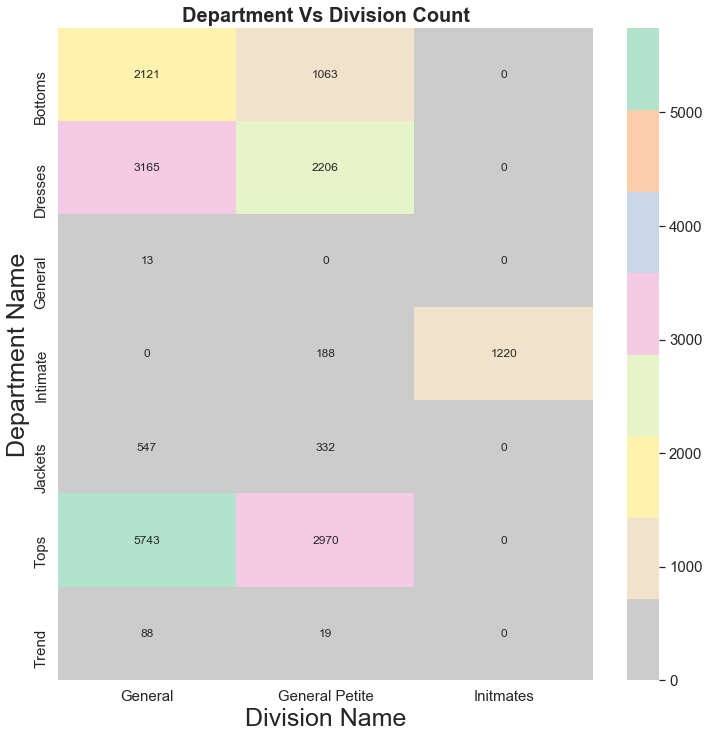

In [110]:
# Department Vs Division Count cross-tabulation table
sns.heatmap(pd.crosstab(womens_clothing_data['Department Name'], womens_clothing_data["Division Name"]),
            annot=True,fmt='g', cmap="Pastel2_r")
plt.title("Department Vs Division Count",fontsize=20,fontweight='bold')

plt.show()

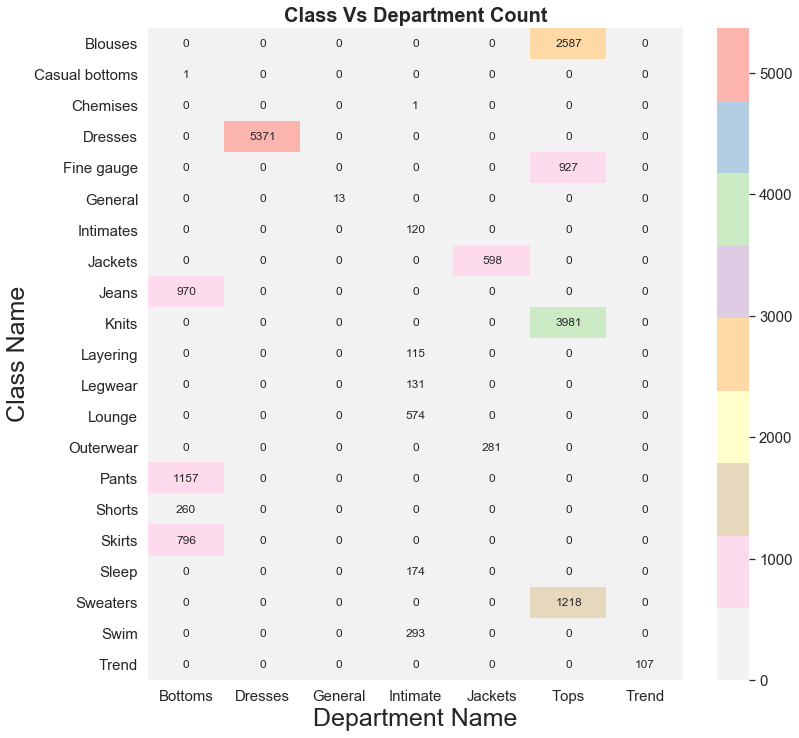

In [111]:
# Class Vs Department Count cross-tabulation table
sns.heatmap(pd.crosstab(womens_clothing_data['Class Name'], womens_clothing_data["Department Name"]),
            annot=True,fmt='g', cmap="Pastel1_r")
plt.title("Class Vs Department Count",fontsize=20,fontweight='bold')
plt.show()

# Identify Positive and Negative Sentiment from Titles

In [186]:
# creating functions to be used for wordcloud and tokenization
def tokenize(text):
    stop_words = set(stopwords.words('english'))
    
    token =word_tokenize(text)
    
    word_token = []

    for w in token:
        if w not in stop_words and not w.isdigit() and w.isalnum() :
            word_token.append(str(w))
    
    freq = nltk.FreqDist(word_token)
    
    new_list = []
    for k,v in freq.items():
        if v >= 1:
            new_list.append(k)
    
    freq.plot(10,cumulative=False)
    plt.show()
    
    return (str(new_list))

def wordcloud(text,my_mask=None):
    wordcloud = WordCloud(width=2000,height=1000,max_words=50,collocations=False,
    min_font_size=10,contour_width=2, contour_color='cadetblue',mask=my_mask,background_color='black').generate(text)

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

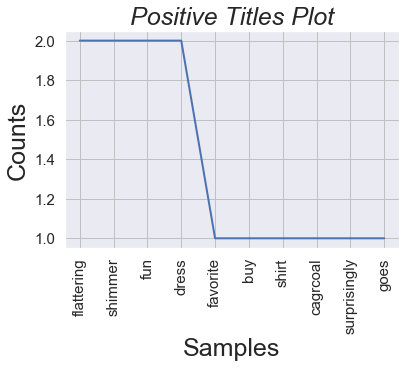

In [184]:
# positive titles plot based on positive word
positive = womens_clothing_data[(womens_clothing_data['Rating'] >2) & 
                        (womens_clothing_data['Recommended IND'] ==1) & 
                       (womens_clothing_data['Sentiment'] =='Positive')]

plt.title("Positive Titles Plot",fontsize=25,fontstyle='oblique');
ret_text = tokenize(str(positive['Title']).lower())

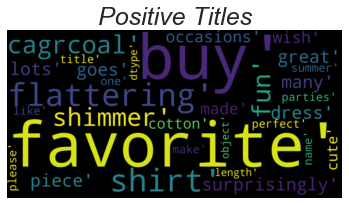

In [187]:
# positive word cloud
plt.title("Positive Titles",fontsize=25,fontstyle='oblique')
wordcloud(ret_text)

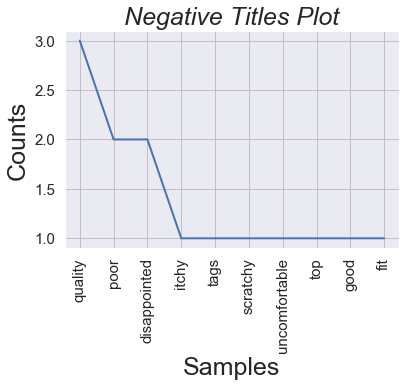

In [180]:
# negativee titles plot based on negative word
negative = womens_clothing_data[(womens_clothing_data['Rating'] < 2) & 
                        (womens_clothing_data['Recommended IND'] == 0) & 
                       (womens_clothing_data['Sentiment'] =='Negative')]

plt.title("Negative Titles Plot",fontsize=25,fontstyle='oblique')
ret_text = tokenize(str(negative['Title']).lower())

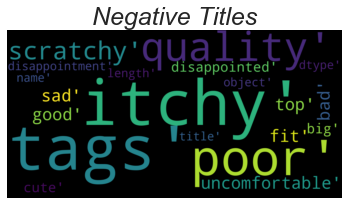

In [181]:
# Negative word cloud
plt.title("Negative Titles",fontsize=25,fontstyle='oblique')
wordcloud(ret_text)

# Cloud of Review Text feature

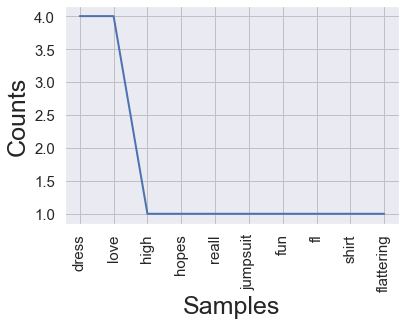

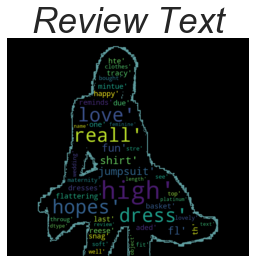

In [190]:
my_mask = np.array(Image.open("woman-in-dress.jpg"))
ret_text = tokenize(str(womens_clothing_data['Review Text']).lower())
plt.title("Review Text",fontsize=35,fontstyle='oblique')
wordcloud(ret_text, my_mask)